In [25]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Useful function for dealing with data, and classical machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Deep learning
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set some standard parameters upfront
%matplotlib inline
pd.options.display.float_format = '{:.1f}'.format
sns.set()  # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)

keras version  2.5.0


In [2]:
def read_data(file_path: str):
    df = pd.read_csv(file_path, dtype={'Subject': int})
    return df


def show_basic_dataframe_info(dataframe: pd.DataFrame):
    """Show number of rows and columns in a dataframe."""
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))


# Load data set containing all the data from csv
df = read_data('../data/kaggle.csv')

In [3]:
# Describe the data
show_basic_dataframe_info(df)
df.head(20)

Number of columns in the dataframe: 563
Number of rows in the dataframe: 7352



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.3,-0.0,-0.1,-1.0,-1.0,-0.9,-1.0,-1.0,-0.9,-0.9,...,-0.7,-0.1,0.0,-0.5,-0.0,-0.8,0.2,-0.1,1,STANDING
1,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,-0.9,0.1,-0.0,-0.7,0.7,-0.8,0.2,-0.1,1,STANDING
2,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,-0.8,-0.1,0.2,0.1,0.8,-0.8,0.2,-0.0,1,STANDING
3,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,-0.5,-0.0,-0.0,0.6,-0.5,-0.8,0.2,-0.0,1,STANDING
4,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,-0.7,0.1,0.1,0.7,-0.6,-0.8,0.2,-0.0,1,STANDING
5,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,-0.8,0.1,-0.1,0.3,-0.4,-0.8,0.2,-0.0,1,STANDING
6,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,-0.6,-0.2,-0.2,0.0,-0.2,-0.9,0.2,-0.0,1,STANDING
7,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,-0.4,-0.0,0.6,-0.6,0.5,-0.9,0.2,-0.0,1,STANDING
8,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,-0.6,0.0,0.1,-0.2,0.1,-0.8,0.2,-0.0,1,STANDING
9,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,0.1,-0.0,-0.1,-0.5,-0.1,-0.8,0.2,-0.0,1,STANDING


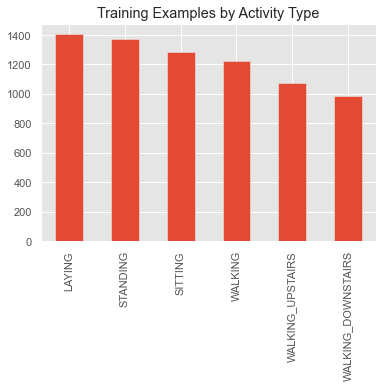

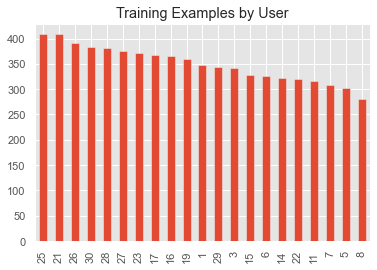

In [4]:
# Show how many training examples exist for each of the six activities
df['Activity'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')
plt.show()
# Better understand how the recordings are spread across the different
# users who participated in the study
df['subject'].value_counts().plot(kind='bar',
                                  title='Training Examples by User')
plt.show()

In [5]:
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df[LABEL] = le.fit_transform(df['Activity'].values.ravel())

In [6]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityEncoded
0,0.3,-0.0,-0.1,-1.0,-1.0,-0.9,-1.0,-1.0,-0.9,-0.9,...,-0.1,0.0,-0.5,-0.0,-0.8,0.2,-0.1,1,STANDING,2
1,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,0.1,-0.0,-0.7,0.7,-0.8,0.2,-0.1,1,STANDING,2
2,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,-0.1,0.2,0.1,0.8,-0.8,0.2,-0.0,1,STANDING,2
3,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,-0.0,-0.0,0.6,-0.5,-0.8,0.2,-0.0,1,STANDING,2
4,0.3,-0.0,-0.1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,...,0.1,0.1,0.7,-0.6,-0.8,0.2,-0.0,1,STANDING,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.3,-0.1,-0.2,-0.2,0.0,0.1,-0.3,0.0,0.1,0.2,...,-0.2,0.8,0.2,-0.4,-0.8,0.2,0.0,30,WALKING_UPSTAIRS,5
7348,0.3,-0.0,-0.1,-0.2,0.0,0.1,-0.3,-0.0,0.1,0.1,...,0.1,0.9,-0.9,0.4,-0.8,0.3,0.1,30,WALKING_UPSTAIRS,5
7349,0.3,-0.0,-0.0,-0.2,-0.1,0.3,-0.3,-0.1,0.3,0.0,...,0.1,-0.3,0.9,0.7,-0.8,0.2,0.0,30,WALKING_UPSTAIRS,5
7350,0.3,-0.0,-0.2,-0.2,-0.1,0.3,-0.3,-0.1,0.3,0.1,...,-0.1,0.7,0.9,-0.6,-0.8,0.2,0.0,30,WALKING_UPSTAIRS,5


Use of PCA for dimensionality reduction, with the criteria of keeping 95% of the explained variance.

In [7]:
pca = PCA()
pca.fit(df.drop(['subject', 'Activity', 'ActivityEncoded'], axis=1))
# Number of components needed to keep 95% of explained variance
(np.cumsum(pca.explained_variance_ratio_) < 0.95).sum()

66

We can see that we need 66 components to keep 95% of the explained variance.

In [8]:
pca = PCA(66)
pca.fit(df.drop(['subject', 'Activity', 'ActivityEncoded'], axis=1))
df_pca = pd.DataFrame(pca.transform(df.drop([
    'subject', 'Activity', 'ActivityEncoded'], axis=1)))
df_pca = pd.concat([df_pca, df.loc[:, [
    'subject', 'Activity', 'ActivityEncoded']]], axis=1)

Comment the following cell to use the regular data instead of the PCA-transformed data

In [9]:
full_df = df.copy()
df = df_pca
df

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,subject,Activity,ActivityEncoded
0,-5.5,-0.3,-1.5,1.3,1.4,-0.2,0.6,0.7,-1.2,-0.4,...,-0.5,0.4,0.2,0.1,0.3,-0.6,-0.1,1,STANDING,2
1,-5.5,-0.1,-1.9,0.7,0.7,0.7,-0.6,-0.8,-0.6,-0.9,...,-0.2,0.1,-0.4,0.1,0.4,-0.2,0.1,1,STANDING,2
2,-5.5,0.3,-2.1,0.5,0.2,-0.0,0.1,0.1,-0.1,-0.2,...,0.1,-0.0,-0.1,0.2,0.0,-0.2,-0.2,1,STANDING,2
3,-5.7,0.9,-2.0,0.2,0.8,1.1,-0.3,-0.7,0.3,0.5,...,0.5,0.1,-0.0,0.1,-0.3,-0.3,-0.2,1,STANDING,2
4,-5.7,1.2,-2.1,0.2,0.5,0.5,-0.2,-0.1,0.3,0.5,...,-0.1,0.0,-0.3,0.1,0.2,0.3,-0.2,1,STANDING,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,6.3,-2.6,0.4,1.5,-0.8,-0.3,-1.3,-0.5,1.5,0.2,...,0.0,-0.5,0.1,0.5,-0.0,-0.0,-0.5,30,WALKING_UPSTAIRS,5
7348,5.8,-2.4,0.5,1.7,-0.8,-0.4,-1.3,-0.3,0.4,-0.8,...,-0.2,-0.3,0.2,-0.3,0.1,-0.0,-0.5,30,WALKING_UPSTAIRS,5
7349,5.9,-3.1,0.7,2.3,-0.5,0.4,-1.0,-0.2,0.3,1.2,...,0.1,-0.2,-0.1,0.3,0.0,0.2,-0.2,30,WALKING_UPSTAIRS,5
7350,5.4,-3.4,0.7,2.0,-0.6,0.4,-1.4,-0.1,0.8,1.7,...,0.2,-0.1,-0.0,0.2,-0.0,0.3,-0.2,30,WALKING_UPSTAIRS,5


We can now use a classical algorithm (RandomForests) to classify our data. Pay 
attention to how we split our train and test datasets. We have chosen to divide
our data by subject (basically, user id). This ensures that our algorithm's score on the test set takes into account it ability to classify activities on people whose data it has never seen.


In [10]:
df_train = df[df.subject < 20]
df_test = df[df.subject >= 20]

X_train = df_train.drop(['subject', 'Activity', 'ActivityEncoded'], axis=1)
y_train = df_train['ActivityEncoded']

X_test = df_test.drop(['subject', 'Activity', 'ActivityEncoded'], axis=1)
y_test = df_test['ActivityEncoded']

Let's have a look at one of our features and how it behaves in different behaviours. This is a violin plot (https://en.wikipedia.org/wiki/Violin_plot)

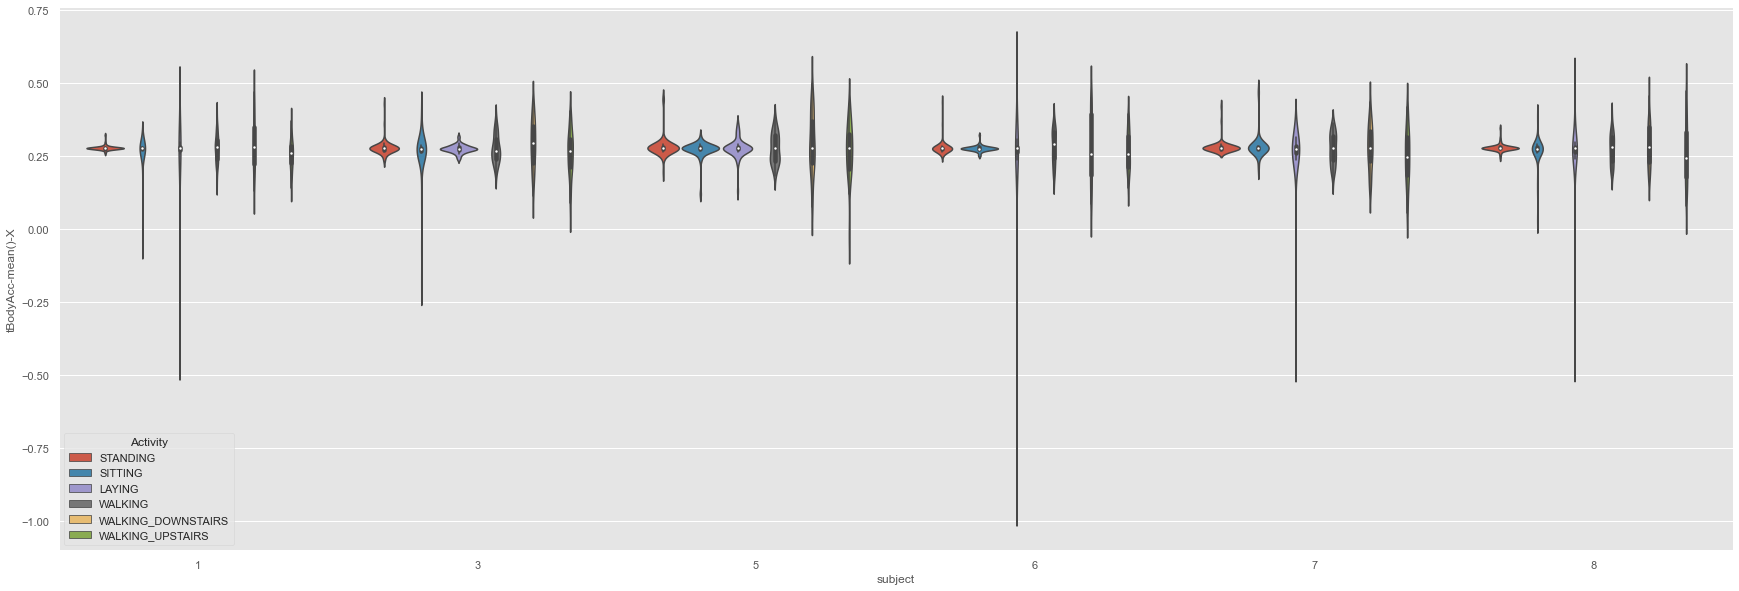

In [11]:
fig = plt.figure(figsize=(30, 10))
ax = fig.gca()
_ = sns.violinplot(ax=ax, data=full_df[full_df.subject < 10],
                   hue='Activity', x='subject',
                   y='tBodyAcc-mean()-X')

In [12]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [13]:
prediction_train = clf.predict(X_train)
print(classification_report(y_train, prediction_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       731
           1       0.80      0.70      0.75       664
           2       0.77      0.84      0.80       723
           3       0.85      0.95      0.90       707
           4       0.96      0.87      0.92       543
           5       0.93      0.88      0.90       597

    accuracy                           0.88      3965
   macro avg       0.88      0.87      0.88      3965
weighted avg       0.88      0.88      0.87      3965



In [14]:
prediction_test = clf.predict(X_test)
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       676
           1       0.76      0.71      0.73       622
           2       0.73      0.79      0.76       651
           3       0.87      0.97      0.92       519
           4       0.93      0.71      0.80       443
           5       0.83      0.88      0.85       476

    accuracy                           0.85      3387
   macro avg       0.85      0.84      0.84      3387
weighted avg       0.85      0.85      0.84      3387



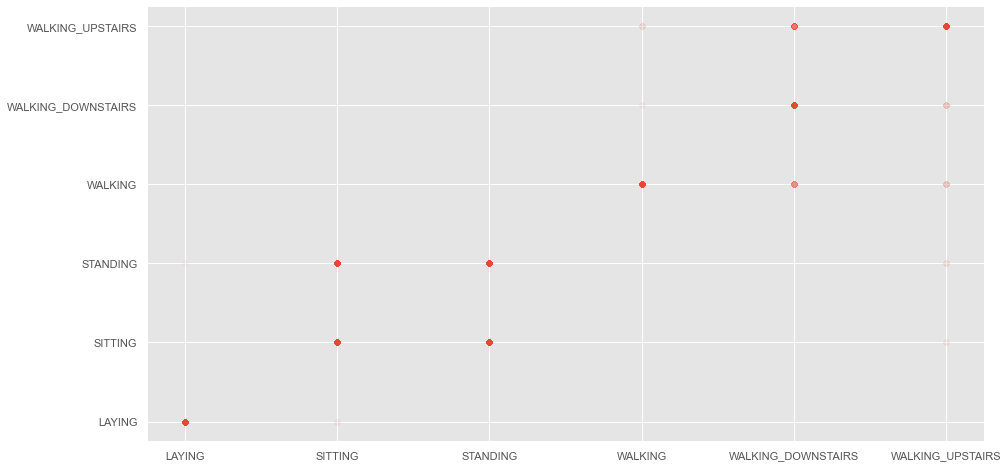

In [15]:
def plot_confusion(true_labels, predicted_labels):
    plt.figure(figsize=(15, 8))
    plt.scatter(true_labels, predicted_labels, alpha=0.01)
    plt.yticks(ticks=range(6), labels=le.inverse_transform(range(6)))
    _ = plt.xticks(ticks=range(6), labels=le.inverse_transform(range(6)))


plot_confusion(y_test, prediction_test)

Our performance is pretty good. We seem to classify LAYING perfectly, but WALKING_UPSTAIRS seems easily mistakend for other activities. Can we do better? We could probably tweak the hyperparameters of our model to find better ones. 

Could we use a neuronal network here? This would be equivalent to Abdull Sukor, Abdul Syafiq & Zakaria, A & Abdul Rahim, Norasmadi. (2018). Activity Recognition using Accelerometer Sensor and Machine Learning Classifiers. 10.1109/CSPA.2018.8368718.

In [16]:
# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=66, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [17]:
y_train_neural = pd.get_dummies(y_train)
model.fit(X_train, y_train_neural, epochs=50, batch_size=100)

Epoch 1/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.5054
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1896 - accuracy: 0.8726
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1085 - accuracy: 0.9238
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9415
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9561
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9612
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9670
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9682
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9723
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9740
Epoch 11/50
40/40 [

In [18]:
prediction_test_neural = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, prediction_test_neural))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       676
           1       0.94      0.88      0.91       622
           2       0.85      0.94      0.89       651
           3       0.97      0.96      0.96       519
           4       0.93      0.92      0.92       443
           5       0.95      0.97      0.96       476

    accuracy                           0.94      3387
   macro avg       0.94      0.94      0.94      3387
weighted avg       0.94      0.94      0.94      3387



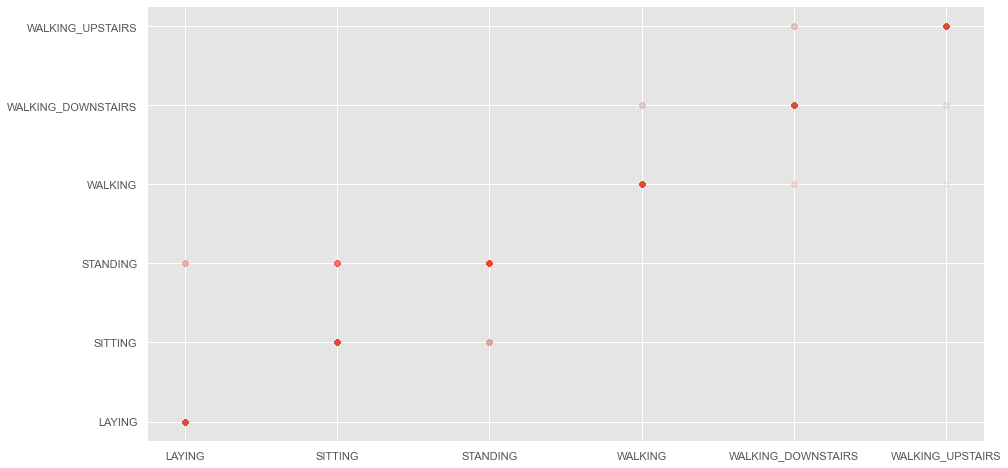

In [19]:
plot_confusion(y_test, prediction_test_neural)

Let us try the DT algorithm to compare its results with the rest.

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
predict_dt_test = dt.predict(X_test)
print(classification_report(y_test, predict_dt_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       676
           1       0.75      0.71      0.73       622
           2       0.74      0.80      0.77       651
           3       0.81      0.66      0.72       519
           4       0.74      0.75      0.75       443
           5       0.68      0.79      0.73       476

    accuracy                           0.79      3387
   macro avg       0.79      0.78      0.78      3387
weighted avg       0.79      0.79      0.79      3387



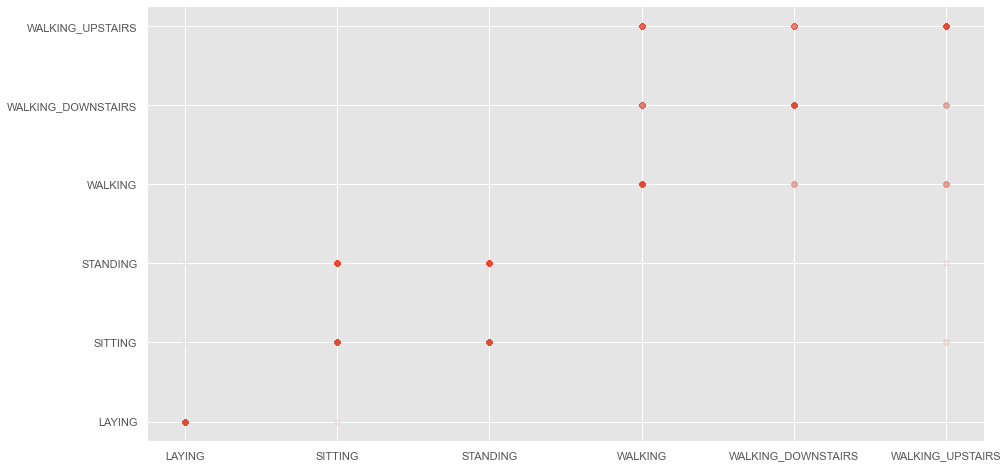

In [22]:
plot_confusion(y_test, predict_dt_test)

The results are a bit worse than the other algorithms. PCA actually lowers the accuracy in this case.

Let us try the DT algorithm to compare its results with the rest.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       676
           1       0.73      0.71      0.72       622
           2       0.74      0.78      0.76       651
           3       0.82      0.70      0.75       519
           4       0.76      0.72      0.74       443
           5       0.67      0.79      0.72       476

    accuracy                           0.79      3387
   macro avg       0.78      0.78      0.78      3387
weighted avg       0.79      0.79      0.79      3387



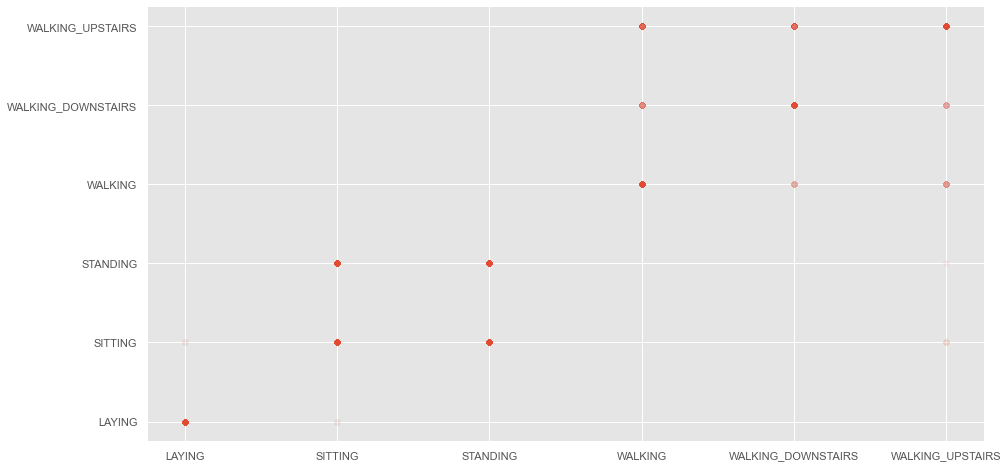

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

predict_dt_test = dt.predict(X_test)
print(classification_report(y_test, predict_dt_test))

plot_confusion(y_test, predict_dt_test)

The results are a bit worse than the other algorithms. PCA actually lowers the accuracy in this case.

Let us try also SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       676
           1       0.92      0.86      0.89       622
           2       0.87      0.92      0.90       651
           3       0.98      0.99      0.99       519
           4       0.95      0.88      0.92       443
           5       0.91      0.96      0.93       476

    accuracy                           0.94      3387
   macro avg       0.94      0.94      0.94      3387
weighted avg       0.94      0.94      0.94      3387

[[676   0   0   0   0   0]
 [  0 533  89   0   0   0]
 [  0  49 602   0   0   0]
 [  0   0   0 515   3   1]
 [  0   0   0   6 391  46]
 [  0   0   1   2  17 456]]


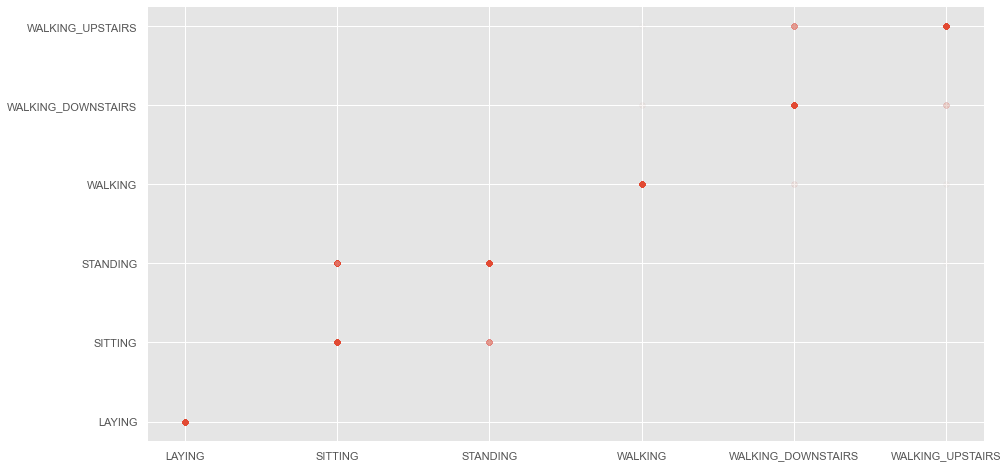

In [26]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction_train_SVM = model.predict(X_train)
prediction_test_SVM = model.predict(X_test)
print(classification_report(y_test, prediction_test_SVM))
plot_confusion(y_test, prediction_test_SVM)

The results are quite similar to those obtained with the neuronal network

<AxesSubplot:>

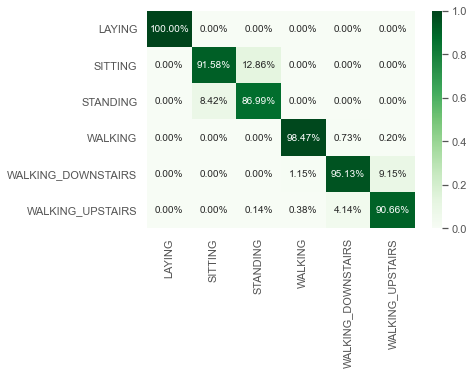

In [27]:
cf_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_test_SVM),
                         columns=le.classes_, index=le.classes_)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
